# Create Text Classfier

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
import re
np.random.seed(4864)

Lets try a Naive bayes model.

naive Bayes regularly generalizes well into data as it is a high bias model, with low variance

This means it is not a very complex model and does not often overfit to the training set which is a great place for us to start

In [188]:
def cleanse(row):
    row_clean = row.replace("-", " ")
    row_clean = re.sub("[\n]", " ",row_clean)
    row_clean = re.sub("[.!?/\()-,:]", "",row_clean)
    row_clean = row_clean.lower()
    return row_clean

def clean_df(df):
    text = []
    target = []
    for row in df.iterrows():
            row_clean = cleanse(row[1][1])
            text.append(row_clean)
    out = pd.DataFrame({'text':text,"target":df.out})
    return out

            

In [189]:
#Create data partitions
df = pd.read_csv('./labeled_descriptions.csv', encoding='latin-1')
df = df.dropna()
clean_df(df)
X_train, X_test, y_train, y_test=train_test_split(df.text, df.out, test_size=0.33,random_state = 4864)

In [190]:
type(X_train)


pandas.core.series.Series

Transform data into sklearns compressed count vector format 

In [191]:

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)
X_train_counts.shape,X_test_counts.shape

((52, 1685), (27, 1685))

In [201]:
count_vect.vocabulary_

{'job': 832,
 'responsibilities': 1320,
 'work': 1662,
 'closely': 274,
 'with': 1659,
 'the': 1517,
 'manager': 911,
 'and': 97,
 'internal': 809,
 'account': 27,
 'teams': 1499,
 'to': 1538,
 'understand': 1577,
 'scope': 1357,
 'timelines': 1536,
 'for': 642,
 'market': 923,
 'mix': 980,
 'modeling': 986,
 'mmm': 982,
 'projects': 1211,
 'help': 721,
 'data': 397,
 'collection': 285,
 'processing': 1194,
 'write': 1671,
 'reproducible': 1304,
 'sql': 1429,
 'scripts': 1358,
 'manipulation': 916,
 'become': 170,
 'subject': 1465,
 'matter': 936,
 'expert': 594,
 'on': 1044,
 'assigned': 130,
 'clients': 269,
 'at': 136,
 'mediabrands': 946,
 'we': 1638,
 'expect': 585,
 'all': 76,
 'our': 1074,
 'modelers': 985,
 'have': 715,
 'solid': 1401,
 'understanding': 1579,
 'of': 1040,
 'clientsõ': 270,
 'business': 218,
 'media': 945,
 'landscape': 852,
 'leverage': 874,
 'mediabrandsõ': 947,
 'proprietary': 1219,
 'tools': 1542,
 'optimizations': 1061,
 'assist': 133,
 'team': 1498,
 'prep

Transform data into frequencies rather than raw count to avoid extreme outliars.

In [192]:

freq_transformer = TfidfTransformer(use_idf=False)
X_train_freq = freq_transformer.fit_transform(X_train_counts)
X_test_freq = freq_transformer.transform(X_test_counts)


Train model with training set

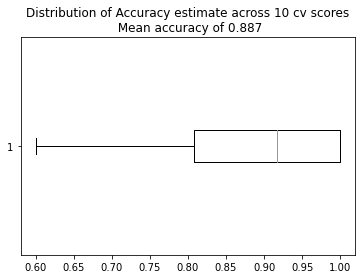

In [193]:
naive = MultinomialNB()
samples = X_train_freq.shape[0]
scores = cross_val_score(naive,X_train_freq,y_train,cv = 10)
naive_classifier = naive.fit(X_train_freq,y_train)
acc = np.round(np.mean(scores),3)

blue_diamond = dict(markerfacecolor='b', marker='D')
plt.boxplot(scores,vert=False,flierprops=blue_diamond)
plt.title(f"Distribution of Accuracy estimate across 10 cv scores\n Mean accuracy of {acc}")
plt.show()

Seems like we have achieved great accuracy on our first model. 

We will keep in this in mind but lets try a support vector machine classifier simply to compare

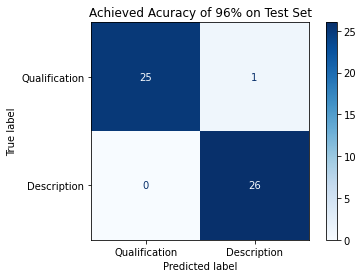

In [194]:
plot_confusion_matrix(naive_classifier,X_train_freq,y_train, display_labels=['Qualification','Description'],cmap=plt.cm.Blues)
plt.title(f"Achieved Acuracy of {naive_classifier.score(X_test_freq,y_test) *100 :.0f}% on Test Set")
plt.show()

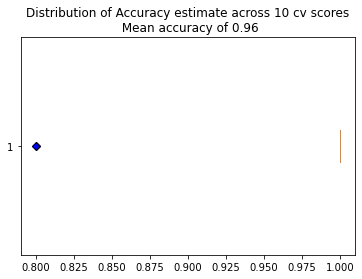

In [195]:
vector_machine = svm.SVC()
vector_classifier = vector_machine.fit(X_train_freq,y_train)
scores = cross_val_score(vector_machine,X_train_freq,y_train,cv = 10)
acc = np.round(np.mean(scores),3)

plt.boxplot(scores,vert=False,flierprops=blue_diamond)
plt.title(f"Distribution of Accuracy estimate across 10 cv scores\n Mean accuracy of {acc}")
plt.show()

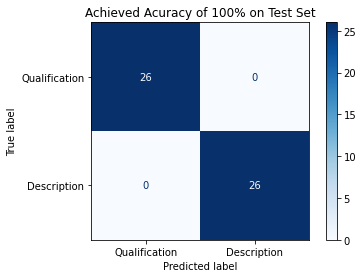

In [196]:
plot_confusion_matrix(vector_classifier,X_train_freq,y_train, display_labels=['Qualification','Description'],cmap=plt.cm.Blues)
plt.title(f"Achieved Acuracy of {vector_classifier.score(X_test_freq,y_test) *100 :.0f}% on Test Set")
plt.show()

Wow seems like we achieved 100% accuracy on our test set

This is not as surprising as qualification text should be fairly distinguishable from description text. 

This is great and means we can export our model and use it to help us identify qualification text in our scraped data

In [197]:
import joblib
joblib.dump(vector_classifier,'classifier.pkl')
joblib.dump(count_vect,'count_vect.pkl')
joblib.dump(freq_transformer,'freq_transformer.pkl')

['freq_transformer.pkl']

TypeError: 'NoneType' object is not callable